In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('crime_data.csv')

In [3]:
df.isnull().any()

jurisdiction                                             False
year                                                     False
population                                               False
murder                                                   False
rape                                                     False
robbery                                                  False
agg_assault                                              False
b_e                                                      False
larceny_theft                                            False
m_v_theft                                                False
grand_total                                              False
violent_crime_total                                      False
violent_crime_percent                                    False
property_crime_totals                                    False
property_crime_percent                                   False
overall_crime_rate_per_100_000_people                  

In [4]:
df = df.fillna(0)
df.isnull().any()

jurisdiction                                             False
year                                                     False
population                                               False
murder                                                   False
rape                                                     False
robbery                                                  False
agg_assault                                              False
b_e                                                      False
larceny_theft                                            False
m_v_theft                                                False
grand_total                                              False
violent_crime_total                                      False
violent_crime_percent                                    False
property_crime_totals                                    False
property_crime_percent                                   False
overall_crime_rate_per_100_000_people                  

In [5]:
df.rename(columns={'agg_assault':'Aggravated Assault','b_e':'Breaking & Entering', 'm_v_theft':'Motor Vehicle Theft'}, inplace=True)

In [6]:
list=df.columns
list

Index(['jurisdiction', 'year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people',
       'percent_change', 'violent_crime_percent_change',
       'property_crime_percent_change',
       'overall_percent_change_per_100_000_people',
       'violent_crime_rate_percent_change_per_100_000_people',
       'property_crime_rate_percent_change_per_100_000_people',
       'murder_rate_percent_change_per_100_000_peo

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   jurisdiction                                           1104 non-null   object 
 1   year                                                   1104 non-null   int64  
 2   population                                             1104 non-null   int64  
 3   murder                                                 1104 non-null   int64  
 4   rape                                                   1104 non-null   int64  
 5   robbery                                                1104 non-null   int64  
 6   Aggravated Assault                                     1104 non-null   int64  
 7   Breaking & Entering                                    1104 non-null   int64  
 8   larceny_theft                                   

In [8]:
df.head()

,jurisdiction,year,population,murder,rape,robbery,Aggravated Assault,Breaking & Entering,larceny_theft,Motor Vehicle Theft,...,overall_percent_change_per_100_000_people,violent_crime_rate_percent_change_per_100_000_people,property_crime_rate_percent_change_per_100_000_people,murder_rate_percent_change_per_100_000_people,rape_rate_percent_change_per_100_000_people,robbery_rate_percent_change_per_100_000_people,agg_assault_rate_percent_change_per_100_000_people,b_e_rate_percent_change_per_100_000_people,larceny_theft_rate_percent_change_per_100_000_people,m_v_theft_rate_percent_change_per_100_000_people
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,-13.4,-41.8,-11.6,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,6.4,49.2,4.5,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,-1.0,-17.5,0.0,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,9.3,8.2,9.4,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7


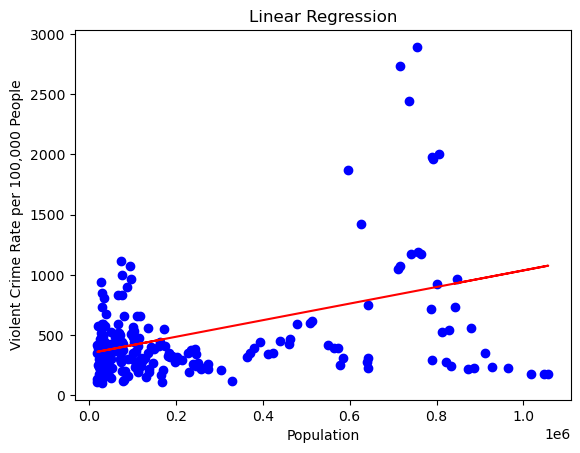

Intercept: 347.3232392807357
Coefficient: [0.00068938]
Mean Squared Error: 146119.92964097994
R-squared: 0.11388142550726421


In [18]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

selected_data = df[['population', 'violent_crime_rate_per_100_000_people']]

# Splitting the dataset into independent and dependent variables
X = selected_data['population'].values.reshape(-1, 1)  
y = selected_data['violent_crime_rate_per_100_000_people'].values  

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)

r2_multi = r2_score(y_test, y_pred)

# Visualizing the data and the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('Population')
plt.ylabel('Violent Crime Rate per 100,000 People')
plt.show()

# Printing the coefficients of the model
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)
print("Mean Squared Error:", mse)
print("R-squared:", r2_multi)


In [10]:
# Creating DataFrames for train and test data
train_df = pd.DataFrame({'Population': X_train.flatten(), 'Violent Crime Rate per 100,000 People': y_train})
test_df = pd.DataFrame({'Population': X_test.flatten(), 'Violent Crime Rate per 100,000 People': y_test})

# Saving train and test data to CSV files
train_df.to_csv('train_data_LR.csv', index=False)
test_df.to_csv('test_data_LR.csv', index=False)

print("Train data saved to train_data_LR.csv")
print("Test data saved to test_data_LR.csv")


Train data saved to train_data_LR.csv
Test data saved to test_data_LR.csv


In [11]:
train_df

,Population,"Violent Crime Rate per 100,000 People"
0,149573,302.9
1,30214,536.2
2,120554,247.2
3,125394,122.0
4,82102,154.7
...,...,...
878,115420,381.2
879,634279,1851.2
880,92169,878.8
881,52011,357.6


In [12]:
test_df

,Population,"Violent Crime Rate per 100,000 People"
0,170347,211.3
1,88155,898.4
2,95856,510.1
3,239031,259.4
4,28797,222.2
...,...,...
216,103796,477.9
217,168032,111.3
218,123385,291.0
219,26841,286.9


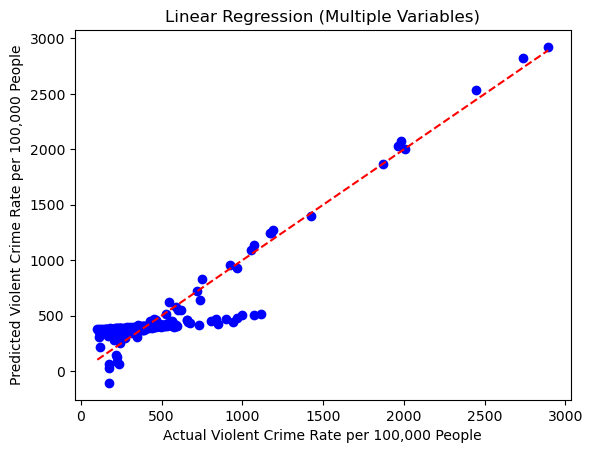

Multiple Linear Regression Results:
Intercept: 393.94188317531786
Coefficients: [-9.32306130e-04  1.54450739e+00  6.97913864e-01  3.88691213e-02
  1.64806840e-01 -1.99935074e-02  1.89345712e-02 -1.29671153e-02]
Mean Squared Error: 22664.558811614093
R-squared: 0.8625547754163321


In [19]:
# Selecting the independent variables
X_multi = df[['population', 'murder', 'rape', 'robbery', 'Aggravated Assault', 'Breaking & Entering', 'larceny_theft', 'Motor Vehicle Theft']].values

# Splitting the dataset into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Making predictions
y_pred_multi = model_multi.predict(X_test_multi)

# Calculating the Mean Squared Error
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
# Calculating R-squared
r2_multi = r2_score(y_test_multi, y_pred_multi)

# Visualizing the data and the regression line for multiple-variable linear regression
plt.scatter(y_test_multi, y_pred_multi, color='blue')
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], color='red', linestyle='--')
plt.title('Linear Regression (Multiple Variables)')
plt.xlabel('Actual Violent Crime Rate per 100,000 People')
plt.ylabel('Predicted Violent Crime Rate per 100,000 People')
plt.show()


print("Multiple Linear Regression Results:")
print("Intercept:", model_multi.intercept_)
print("Coefficients:", model_multi.coef_)
print("Mean Squared Error:", mse_multi)
print("R-squared:", r2_multi)


In [14]:
# For single-variable linear regression
print("Single Variable Linear Regression:")
print("Linear Equation: Violent Crime Rate = {:.2f} + {:.2f} * Population".format(model.intercept_, model.coef_[0]))
population_example = 100000  # Example population value
predicted_violent_crime_rate = model.predict([[population_example]])
print("Predicted Violent Crime Rate for Population {}: {:.2f}".format(population_example, predicted_violent_crime_rate[0]))

# For multiple-variable linear regression
print("\nMultiple Variable Linear Regression:")
print("Linear Equation: Violent Crime Rate = {:.2f}".format(model_multi.intercept_), end="")
for i, coef in enumerate(model_multi.coef_):
    print(" + {:.2f} * {}".format(coef, df.columns[i+2]), end="")  # Skip the first two columns (population and violent crime rate)


Single Variable Linear Regression:
Linear Equation: Violent Crime Rate = 347.32 + 0.00 * Population
Predicted Violent Crime Rate for Population 100000: 416.26

Multiple Variable Linear Regression:
Linear Equation: Violent Crime Rate = 393.94 + -0.00 * population + 1.54 * murder + 0.70 * rape + 0.04 * robbery + 0.16 * Aggravated Assault + -0.02 * Breaking & Entering + 0.02 * larceny_theft + -0.01 * Motor Vehicle Theft

In [15]:
# Create DataFrames for train and test data with multiple variables
train_multi_df = pd.DataFrame(data=np.column_stack((X_train_multi, y_train_multi)), columns=['Population', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault', 'Breaking & Entering', 'Larceny Theft', 'Motor Vehicle Theft', 'Violent Crime Rate per 100,000 People'])
test_multi_df = pd.DataFrame(data=np.column_stack((X_test_multi, y_test_multi)), columns=['Population', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault', 'Breaking & Entering', 'Larceny Theft', 'Motor Vehicle Theft', 'Violent Crime Rate per 100,000 People'])

# Save train and test data with multiple variables to CSV files
train_multi_df.to_csv('train_data_multi_LR.csv', index=False)
test_multi_df.to_csv('test_data_multi_LR.csv', index=False)

print("Train data with multiple variables saved to train_data_multi.csv")
print("Test data with multiple variables saved to test_data_multi.csv")


Train data with multiple variables saved to train_data_multi.csv
Test data with multiple variables saved to test_data_multi.csv


In [16]:
train_multi_df

,Population,Murder,Rape,Robbery,Aggravated Assault,Breaking & Entering,Larceny Theft,Motor Vehicle Theft,"Violent Crime Rate per 100,000 People"
0,149573.0,9.0,30.0,121.0,293.0,809.0,1974.0,175.0,302.9
1,30214.0,0.0,14.0,25.0,123.0,247.0,548.0,67.0,536.2
2,120554.0,1.0,31.0,41.0,225.0,700.0,2020.0,126.0,247.2
3,125394.0,5.0,24.0,34.0,90.0,623.0,2465.0,185.0,122.0
4,82102.0,3.0,7.0,32.0,85.0,592.0,1390.0,102.0,154.7
...,...,...,...,...,...,...,...,...,...
878,115420.0,4.0,15.0,76.0,345.0,1285.0,2790.0,181.0,381.2
879,634279.0,276.0,182.0,4085.0,7199.0,8022.0,21819.0,6731.0,1851.2
880,92169.0,5.0,42.0,230.0,533.0,1070.0,2746.0,191.0,878.8
881,52011.0,1.0,16.0,31.0,138.0,432.0,1751.0,33.0,357.6


In [17]:
test_multi_df

,Population,Murder,Rape,Robbery,Aggravated Assault,Breaking & Entering,Larceny Theft,Motor Vehicle Theft,"Violent Crime Rate per 100,000 People"
0,170347.0,1.0,21.0,40.0,298.0,597.0,2172.0,124.0,211.3
1,88155.0,5.0,32.0,205.0,550.0,914.0,2715.0,185.0,898.4
2,95856.0,5.0,19.0,58.0,407.0,892.0,2391.0,386.0,510.1
3,239031.0,1.0,50.0,131.0,438.0,675.0,3105.0,198.0,259.4
4,28797.0,2.0,8.0,1.0,53.0,66.0,215.0,12.0,222.2
...,...,...,...,...,...,...,...,...,...
216,103796.0,3.0,32.0,91.0,370.0,253.0,1360.0,93.0,477.9
217,168032.0,5.0,36.0,19.0,127.0,164.0,974.0,48.0,111.3
218,123385.0,2.0,35.0,58.0,264.0,766.0,2296.0,184.0,291.0
219,26841.0,3.0,4.0,13.0,57.0,266.0,673.0,43.0,286.9
